In [1]:
import numpy as np
import pandas as pd

from IPython.display import display, Markdown
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(style="darkgrid")
plt.style.use('dark_background')

# Interesting Task Ideas
1. Understanding what content is available in different countries
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. Does Netflix has more focus on TV Shows than movies in recent years.

# NetFlix Dataset Say, what kind of thing people like to watch 
NetFlix make that kind of Content again & again...

In [2]:
netflix_data=pd.read_csv('../input/netflix-shows/netflix_titles.csv')
display(Markdown('#### head 2'))
display(netflix_data.head(2))
display(Markdown('#### tail 2'))
display(netflix_data.tail(2))

#### head 2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


#### tail 2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [3]:
netflix_data.shape

(8807, 12)

In [4]:
netflix_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


this dataset have null values let's check it out

In [5]:
print('column name    number null')
print(netflix_data.isnull().sum())
print('---------------how many null rate in columnes-----------------')
for i in netflix_data.columns:
    null_percenta=(netflix_data[i].isnull().sum()/len(netflix_data))*100
    if null_percenta>0:
        print(f'{i} null rate {round(null_percenta,2)}%')
        
print('=='*20,'duplicate values',f'\nduplicate rate ==> {(netflix_data.duplicated().sum()/len(netflix_data))*100 } % ')  # you can check that column have or not dublicat value , through just uncommenting
# netflix_data.drop_duplicates(inplace=True)

column name    number null
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
---------------how many null rate in columnes-----------------
director null rate 29.91%
cast null rate 9.37%
country null rate 9.44%
date_added null rate 0.11%
rating null rate 0.05%
duration null rate 0.03%
======================================== duplicate values 
duplicate rate ==> 0.0 % 


we can lock also in parcentage

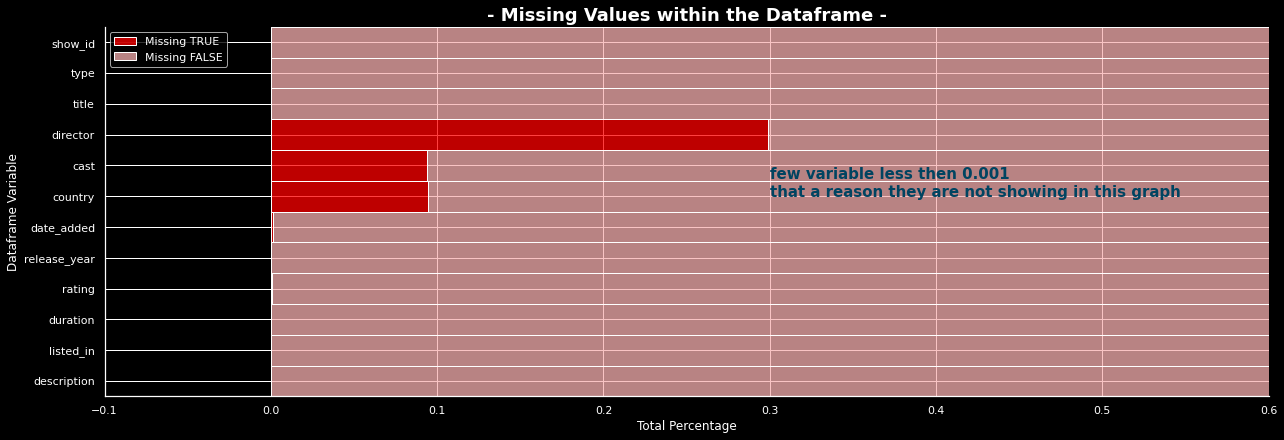

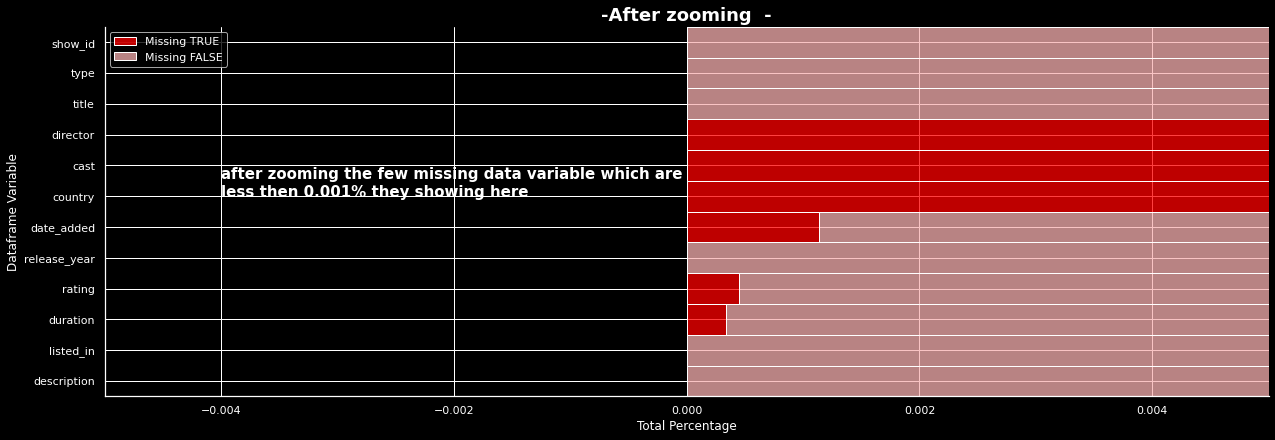

In [6]:
sns.displot(
    data=netflix_data.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing"  ,   # catgorige columne come
    multiple="fill",

    aspect=3,
    height=6,
    # Change colors
    palette=['#f7b0b0','#ff0000'], 
    legend=False)
plt.xlim([-0.1,0.6])
plt.title("- Missing Values within the Dataframe -", size=18, weight="bold")
plt.xlabel("Total Percentage")
plt.ylabel("Dataframe Variable")
plt.text(x=0.3,y=5,s='\nfew variable less then 0.001\nthat a reason they are not showing in this graph',color='#004461',fontsize=15,fontweight='bold')
plt.legend(["Missing TRUE", "Missing FALSE"]);


sns.displot(
    data=netflix_data.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing"  ,   # catgorige columne come
    multiple="fill",
    aspect=3,
    height=6,
    # Change colors
    palette=['#f7b0b0','#ff0000'], 
    legend=False,)
plt.xlim([-0.005,0.005])
plt.title("-After zooming  -", size=18, weight="bold")
plt.xlabel("Total Percentage")
plt.ylabel("Dataframe Variable")
plt.text(x=-0.004,y=5,s='\nafter zooming the few missing data variable which are\nless then 0.001% they showing here',color='w',fontsize=15,fontweight='bold')
plt.legend(["Missing TRUE", "Missing FALSE"]);

# Cleaning Data

In [7]:
netflix_data.dropna(axis=0,inplace=True)
netflix_data.drop_duplicates(inplace=True)

# Features Engineering
* `date_added` feature which dtype is `objective` convert into `datetime` dtype
* `date_added` feature extrecting `month, month_name, year, day`

In [8]:
netflix_data['date_added']=pd.to_datetime(netflix_data['date_added'])  
netflix_data['date_added_month']=netflix_data['date_added'].dt.month
netflix_data['date_added_month_name']=netflix_data['date_added'].dt.month_name()
netflix_data['date_added_year']=netflix_data['date_added'].dt.year
netflix_data['date_added_day']=netflix_data['date_added'].dt.day

In [9]:
netflix_date=netflix_data['date_added'].dropna(axis=0)
# netflix_date['date_added'].apply(lambda x:x.split())

# Data Visualization
let's asking question to dataset...

Answer is in two way `raw Data summary` and `data visualization`... 
# which country have Maximum number of movies???

United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: country, dtype: int64


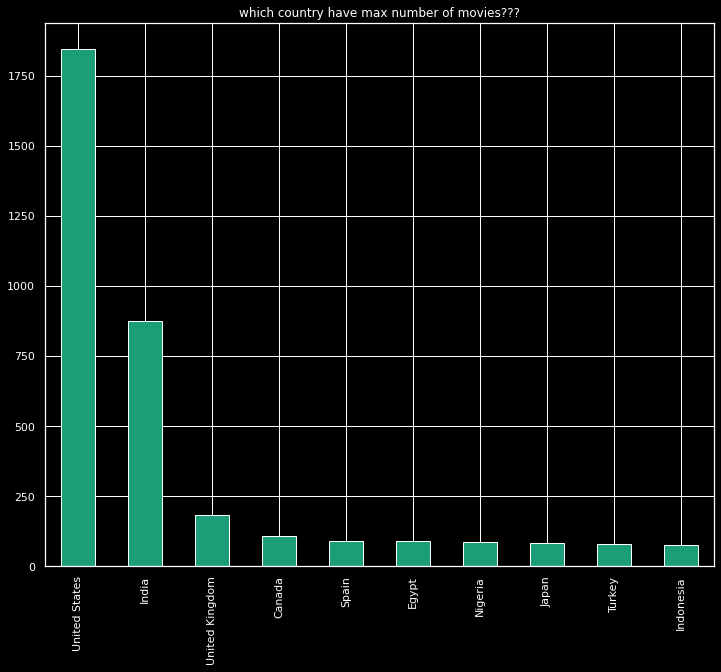

In [10]:
print(netflix_data.country.value_counts()[:10])
plt.figure(figsize=(12,10))
netflix_data.country.value_counts()[:10].plot.bar(colormap='Dark2',)
plt.title('which country have max number of movies???')
plt.show()

# In Country how many Movies Lovers & how many TV Shows lovers???

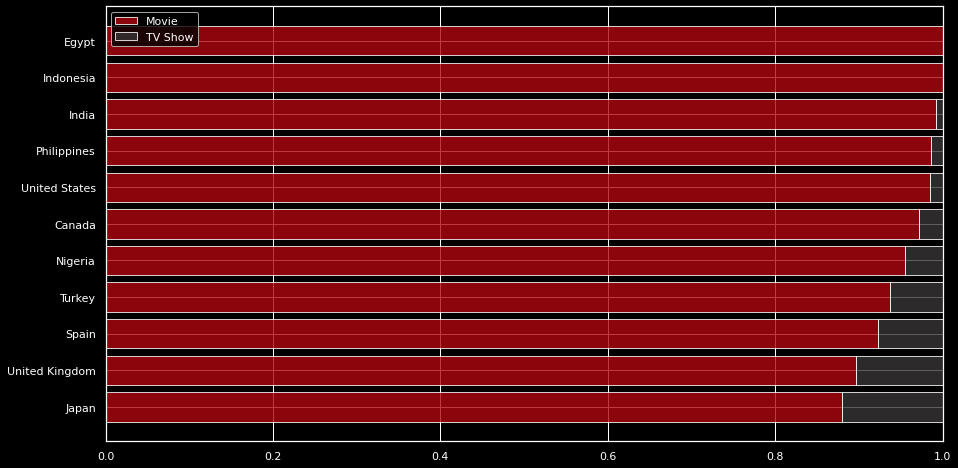

most of contry like to watch movie but few country still like to watch TV Show like japan, UK, spain Etc.


In [11]:


country_order = netflix_data['country'].value_counts()[:11].index
data_q2q3 = netflix_data[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]




##
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#383535', alpha=0.8, label='TV Show')
plt.legend(loc='upper left')
plt.show()
print('most of contry like to watch movie but few country still like to watch TV Show like japan, UK, spain Etc.')

# which type of thing people like to watch Movie/TV Show?

Movie      5185
TV Show     147
Name: type, dtype: int64


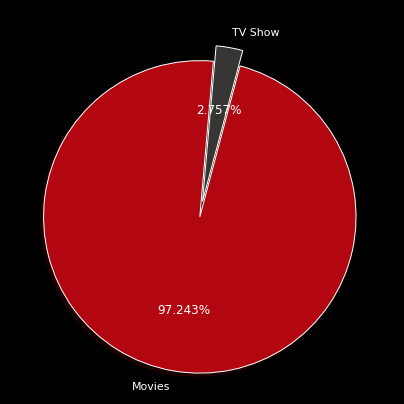

In [12]:
plt.figure(figsize=(7,9))
print(netflix_data['type'].value_counts())
plt.pie(netflix_data['type'].value_counts(),labels=['Movies','TV Show'],shadow=True,autopct='%1.3f%%',explode =[0.1,0],startangle=85,colors=['#b20710','#383535'])
plt.show()

In [13]:
# let's check out number of unique values inside the colummns
for i in netflix_data.columns:
    print(f'{i}  ====> {netflix_data[i].nunique()}')
    
print('This Lettle process help in over Visualization!!!')

show_id  ====> 5332
type  ====> 2
title  ====> 5332
director  ====> 3945
cast  ====> 5200
country  ====> 604
date_added  ====> 1450
release_year  ====> 72
rating  ====> 14
duration  ====> 198
listed_in  ====> 335
description  ====> 5321
date_added_month  ====> 12
date_added_month_name  ====> 12
date_added_year  ====> 14
date_added_day  ====> 31
This Lettle process help in over Visualization!!!


# Top 15 most Movies Makeing Directors?


Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Troy Miller                8
Hakan Algül                8
Robert Rodriguez           8
Name: director, dtype: int64


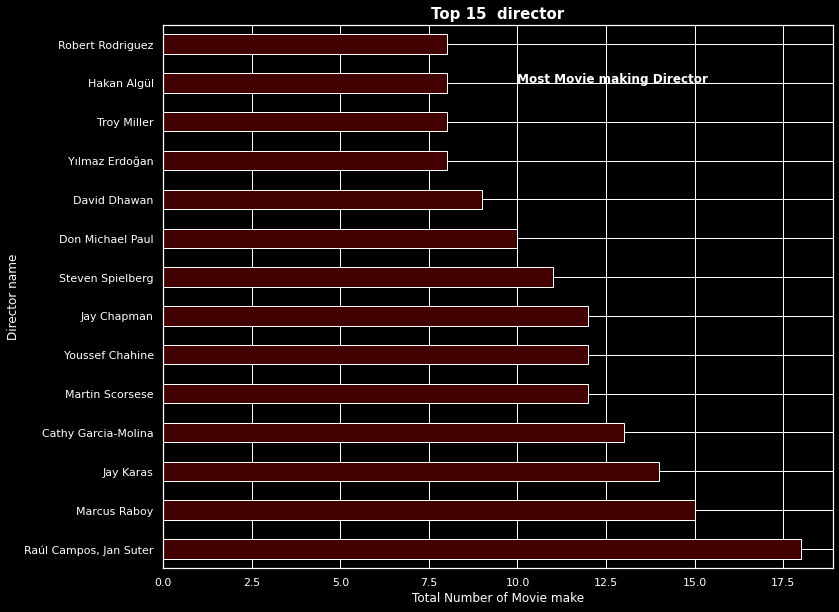

In [14]:
plt.figure(figsize=(12,10))
print(netflix_data.director.value_counts()[:14])
netflix_data.director.value_counts()[:14].plot.barh(colormap='pink',color='#420000')

plt.text(x=10,y=12,s='Most Movie making Director',fontweight='bold',fontsize=12,fontfamily='sans-serif')

plt.title('Top 15  director',fontsize=15,fontweight='extra bold')
plt.xlabel('Total Number of Movie make')
plt.ylabel('Director name')
plt.show()

# Top 15 Director get many rating...

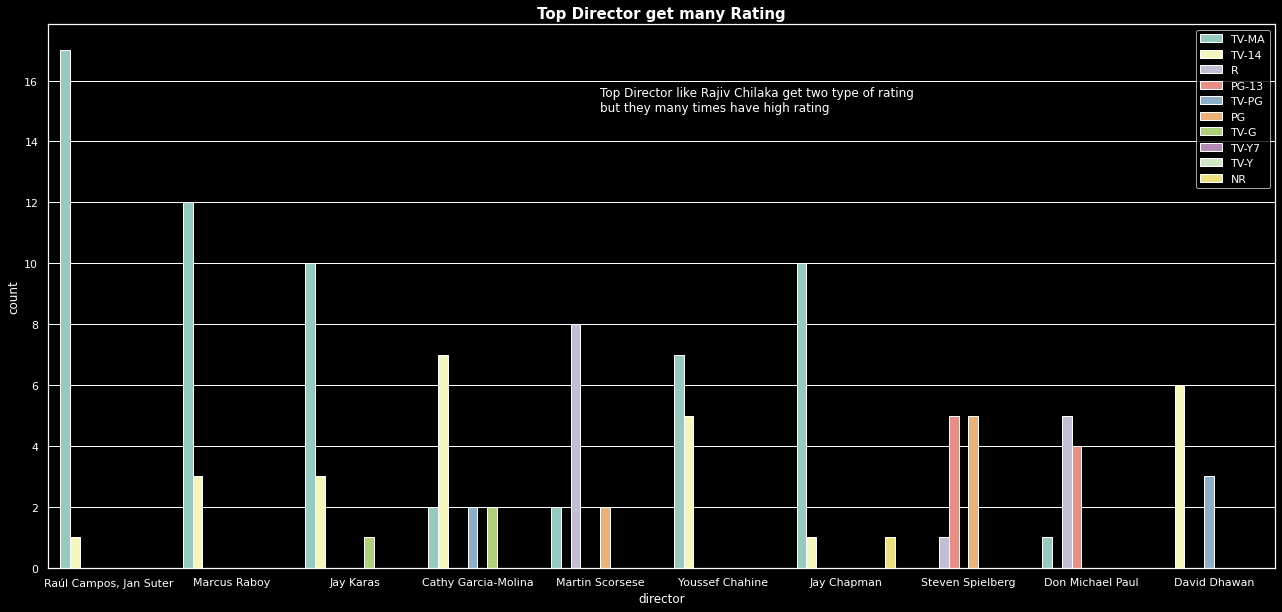

In [15]:
plt.figure(figsize=(22,10))

sns.countplot(hue='rating', x='director',data=netflix_data,order=netflix_data['director'].value_counts().index[0:10],hue_order=netflix_data['rating'].value_counts().index[0:10],)
plt.legend(loc='upper right')
plt.title('Top Director get many Rating', fontsize= 15, fontweight='bold')
plt.text(x=4,y=15,s='Top Director like Rajiv Chilaka get two type of rating\nbut they many times have high rating')
plt.show()

# what type of Genos people like to interset


In [16]:
netflix_data.listed_in.value_counts().describe()

count    335.000000
mean      15.916418
std       40.762701
min        1.000000
25%        1.000000
50%        3.000000
75%        8.000000
max      336.000000
Name: listed_in, dtype: float64

above `75 percentile` over target, that mean 25% percentage of movie type **people like to watch**

over was skewed std so far away to mean 

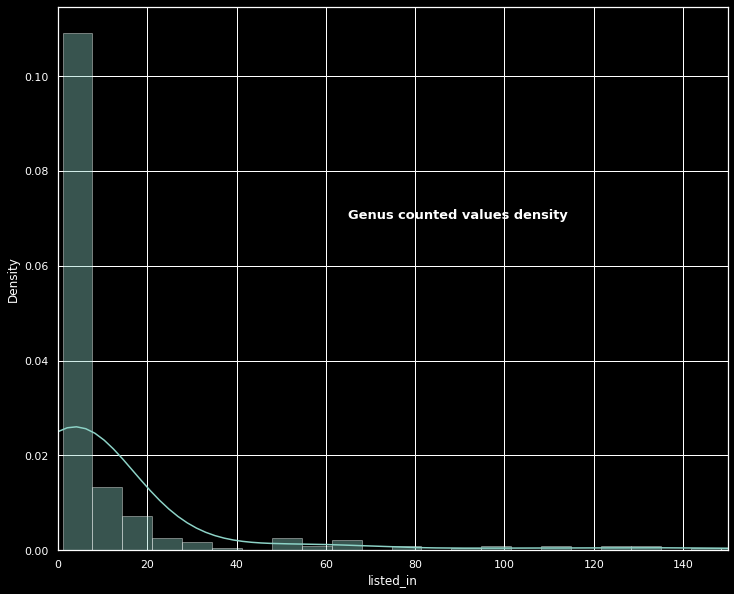

In [17]:
plt.figure(figsize=(12,10))
sns.distplot(netflix_data.listed_in.value_counts())
plt.xlim(0,150)
plt.text(x=65,y=0.07,s='Genus counted values density',fontweight='bold',fontsize=13)
plt.show()

# According to Data 15 Cetgories/Genres people like to most

Dramas, International Movies                        336
Stand-Up Comedy                                     286
Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  179
Dramas, International Movies, Romantic Movies       160
Documentaries                                       156
Comedies, International Movies                      152
Comedies, International Movies, Romantic Movies     143
Dramas                                              133
Children & Family Movies                            132
Action & Adventure                                  127
Dramas, International Movies, Thrillers             125
Comedies, Dramas, Independent Movies                114
Name: listed_in, dtype: int64


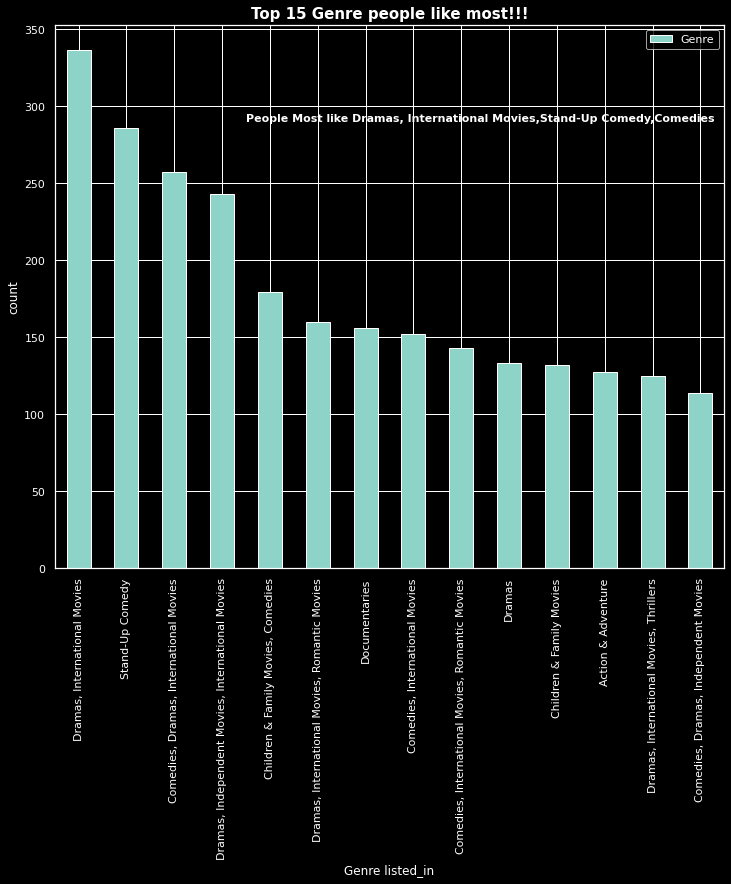

In [18]:
# plt.pcolor(netflix_data, cmap='afmhot_r')
plt.figure(figsize=(12,10))
print(netflix_data.listed_in.value_counts()[:14])
netflix_data.listed_in.value_counts()[:14].plot.bar()
plt.title('Top 15 Genre people like most!!!',fontweight='bold',fontsize=15)
plt.legend(['Genre'])
plt.text(x=3.5,y=290,s='People Most like Dramas, International Movies,Stand-Up Comedy,Comedies ',fontweight='bold',fontsize=11)
plt.xlabel('Genre listed_in')
plt.ylabel('count')
plt.show()

# Number of time rating geting
like TV-MA get 1822 times & TV-14 get 1214 times

In [19]:
netflix_data['rating'].value_counts().sort_values(ascending=False)[:2]

TV-MA    1822
TV-14    1214
Name: rating, dtype: int64

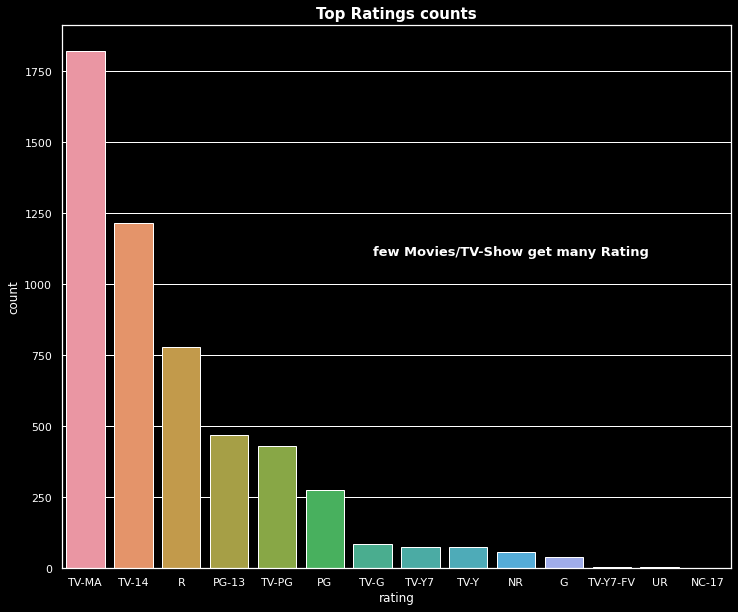

In [20]:
plt.figure(figsize=(12,10))
sns.countplot(netflix_data['rating'],order=netflix_data['rating'].value_counts().index[0:15])
plt.title('Top Ratings counts',fontweight='bold',fontsize=15)
plt.text(x=6,y=1100,s='few Movies/TV-Show get many Rating',fontweight='bold',fontsize=13)
plt.show()

how many most popluare Cetagori in top rateded

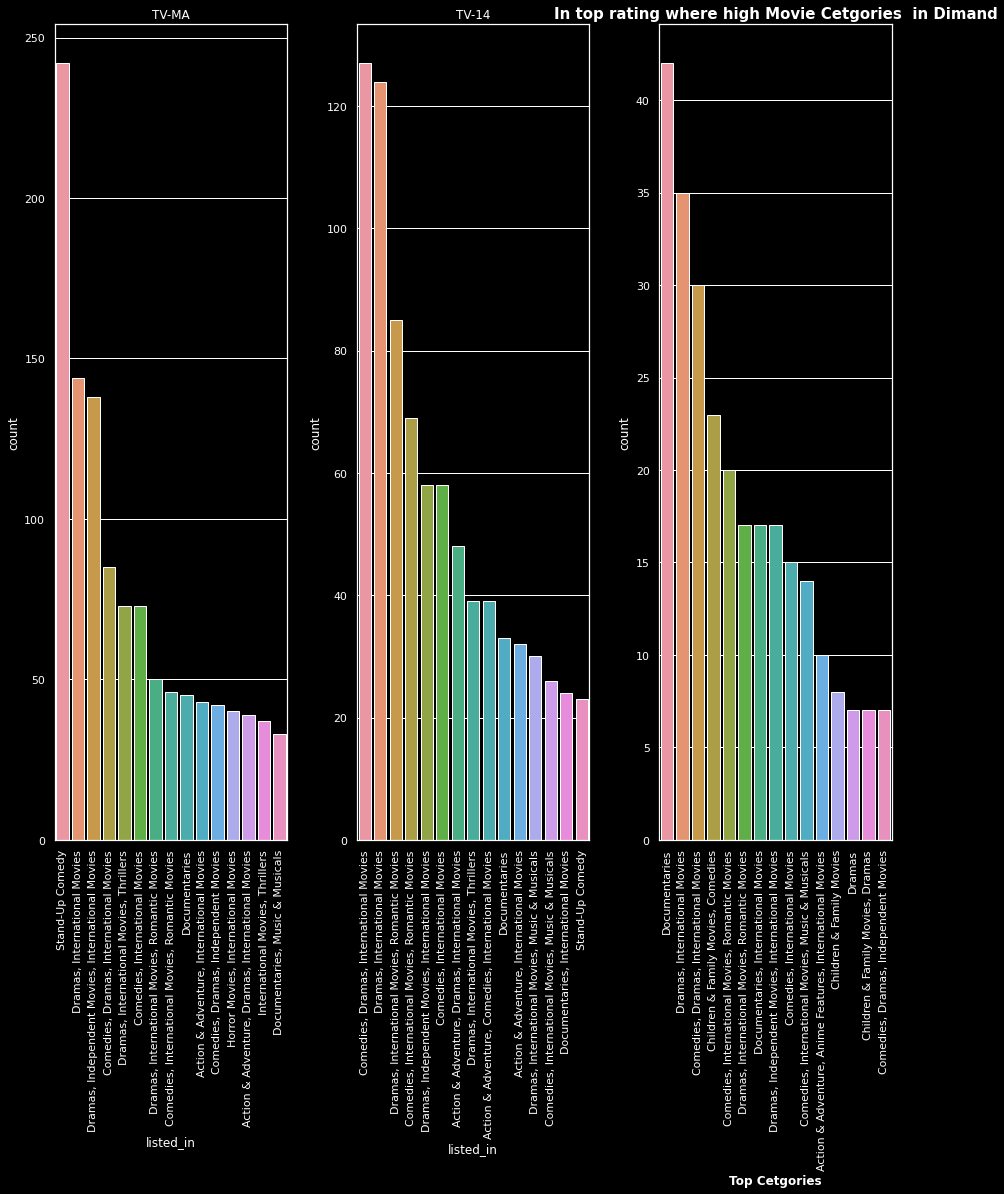

In [21]:
netflix_rate_MA=netflix_data.loc[netflix_data['rating']=='TV-MA']
netflix_rate_14=netflix_data.loc[netflix_data['rating']=='TV-14']
netflix_rate_PG=netflix_data.loc[netflix_data['rating']=='TV-PG']

fig,ax=plt.subplots(1,3,figsize=(15,15))

ax[0].tick_params(axis='x', rotation=90)
ax[0].title.set_text('TV-MA')

ax[1].tick_params(axis='x', rotation=90)
ax[1].title.set_text('TV-14',)

ax[2].tick_params(axis='x', rotation=90)
ax[2].title.set_text('TV-PG')
plt.subplots_adjust(wspace=0.3)



sns.countplot(netflix_rate_MA['listed_in'],order=netflix_rate_MA['listed_in'].value_counts().index[0:15],ax=ax[0])


sns.countplot(netflix_rate_14['listed_in'],order=netflix_rate_14['listed_in'].value_counts().index[0:15],ax=ax[1])

sns.countplot(netflix_rate_PG['listed_in'],order=netflix_rate_PG['listed_in'].value_counts().index[0:15],ax=ax[2])

plt.title('In top rating where high Movie Cetgories  in Dimand', fontsize= 15, fontweight='bold')
plt.xlabel('Top Cetgories',fontweight='bold')
plt.show()

top rated movies few catgories always in demond & people most watch :)

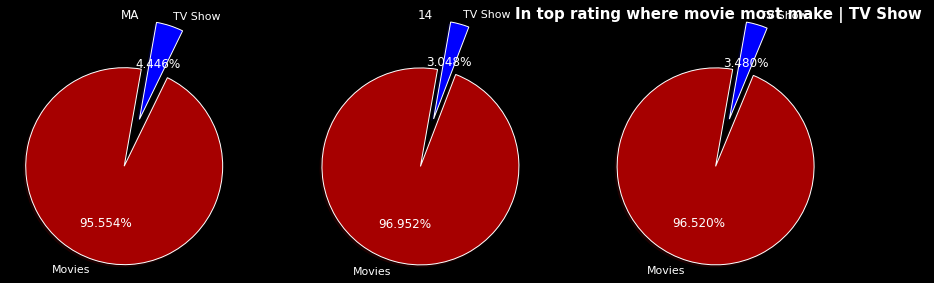

In [22]:
netflix_rate_MA['type'].value_counts()

# plt.figure(figsize=(7,9))
fig,ax=plt.subplots(1,3,figsize=(15,10))

# print(netflix_data['type'].value_counts())
ax[0].pie(netflix_rate_MA['type'].value_counts(),labels=['Movies','TV Show'],shadow=True,autopct='%1.3f%%',explode =[0.2,0.3],colors=['#a60000','blue'],startangle=80)
ax[0].title.set_text('MA')
ax[1].pie(netflix_rate_14['type'].value_counts(),labels=['Movies','TV Show'],shadow=True,autopct='%1.3f%%',explode =[0.2,0.3],colors=['#a60000','blue'],startangle=80)
ax[1].title.set_text('14')
ax[2].pie(netflix_rate_PG['type'].value_counts(),labels=['Movies','TV Show'],shadow=True,autopct='%1.3f%%',explode =[0.2,0.3],colors=['#a60000','blue'],startangle=80,)
ax[2].title.set_text('PG')
plt.title('In top rating where movie most make | TV Show ', fontsize= 15, fontweight='bold')

plt.show()


# top rating Cetgories

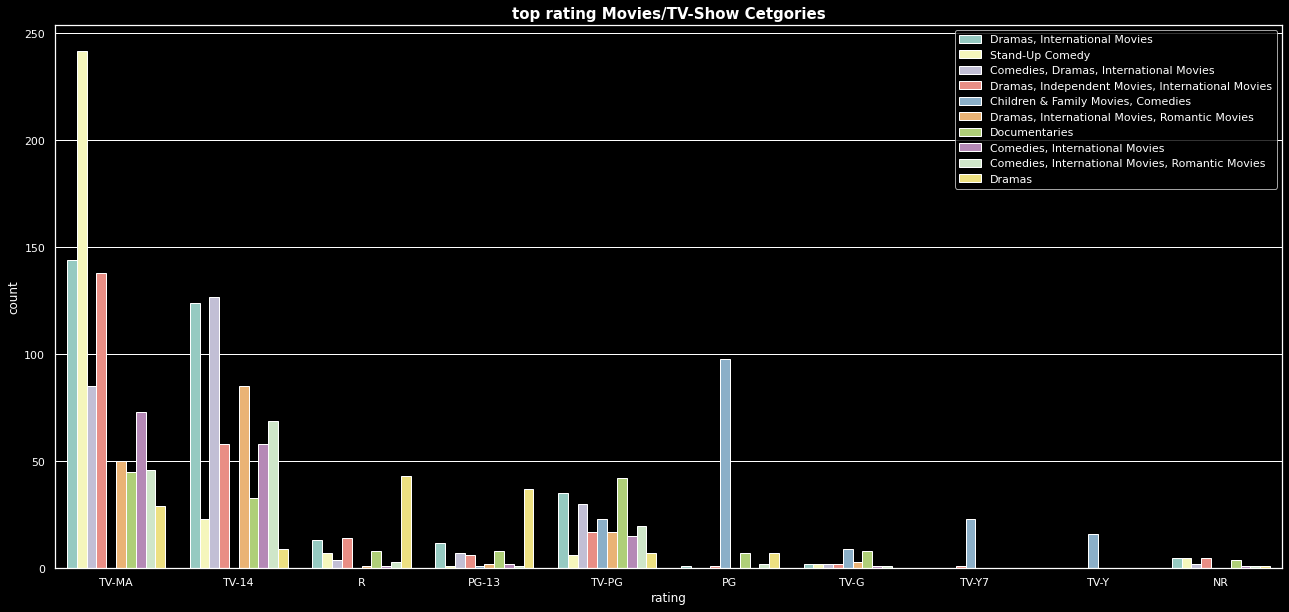

In [23]:
plt.figure(figsize=(22,10))

sns.countplot(hue='listed_in', x='rating',data=netflix_data,order=netflix_data['rating'].value_counts().index[0:10],hue_order=netflix_data['listed_in'].value_counts().index[0:10],)
plt.legend(loc='upper right')
plt.title('top rating Movies/TV-Show Cetgories', fontsize= 15, fontweight='bold')
plt.show()

# growth of  Movies against TV Shows in recent year...

In [24]:
netflix_data.reset_index(inplace=True)


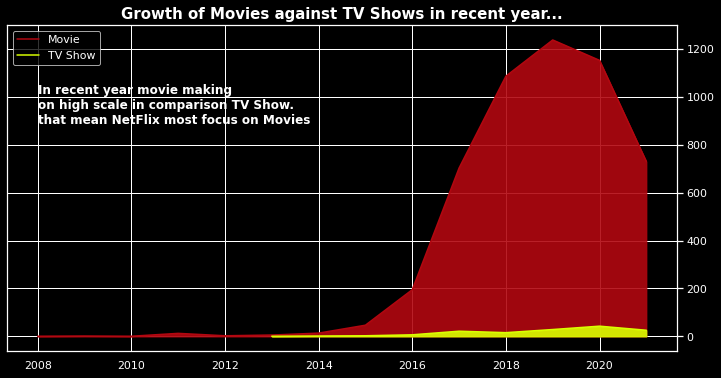

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#d9ff00"]
type_feature=['Movies','Tv Shows']
for i, mtv in enumerate(netflix_data['type'].value_counts().index):
    mtv_rel = netflix_data[netflix_data['type']==mtv]['date_added_year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel,color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index,mtv_rel, color=color[i],alpha=0.9)
    ax.yaxis.set_ticks_position("right")
    plt.legend(loc='upper left')
# plt.legend(['Movie','TV Show'])
plt.title('Growth of Movies against TV Shows in recent year...',fontweight='bold',fontsize=15)
plt.text(x=2008,y=888,s='In recent year movie making\non high scale in comparison TV Show.\nthat mean NetFlix most focus on Movies',fontweight='bold',fontsize=12)
plt.show()

**!!!! goal of this notebook is only practice of EDA !!!!**


